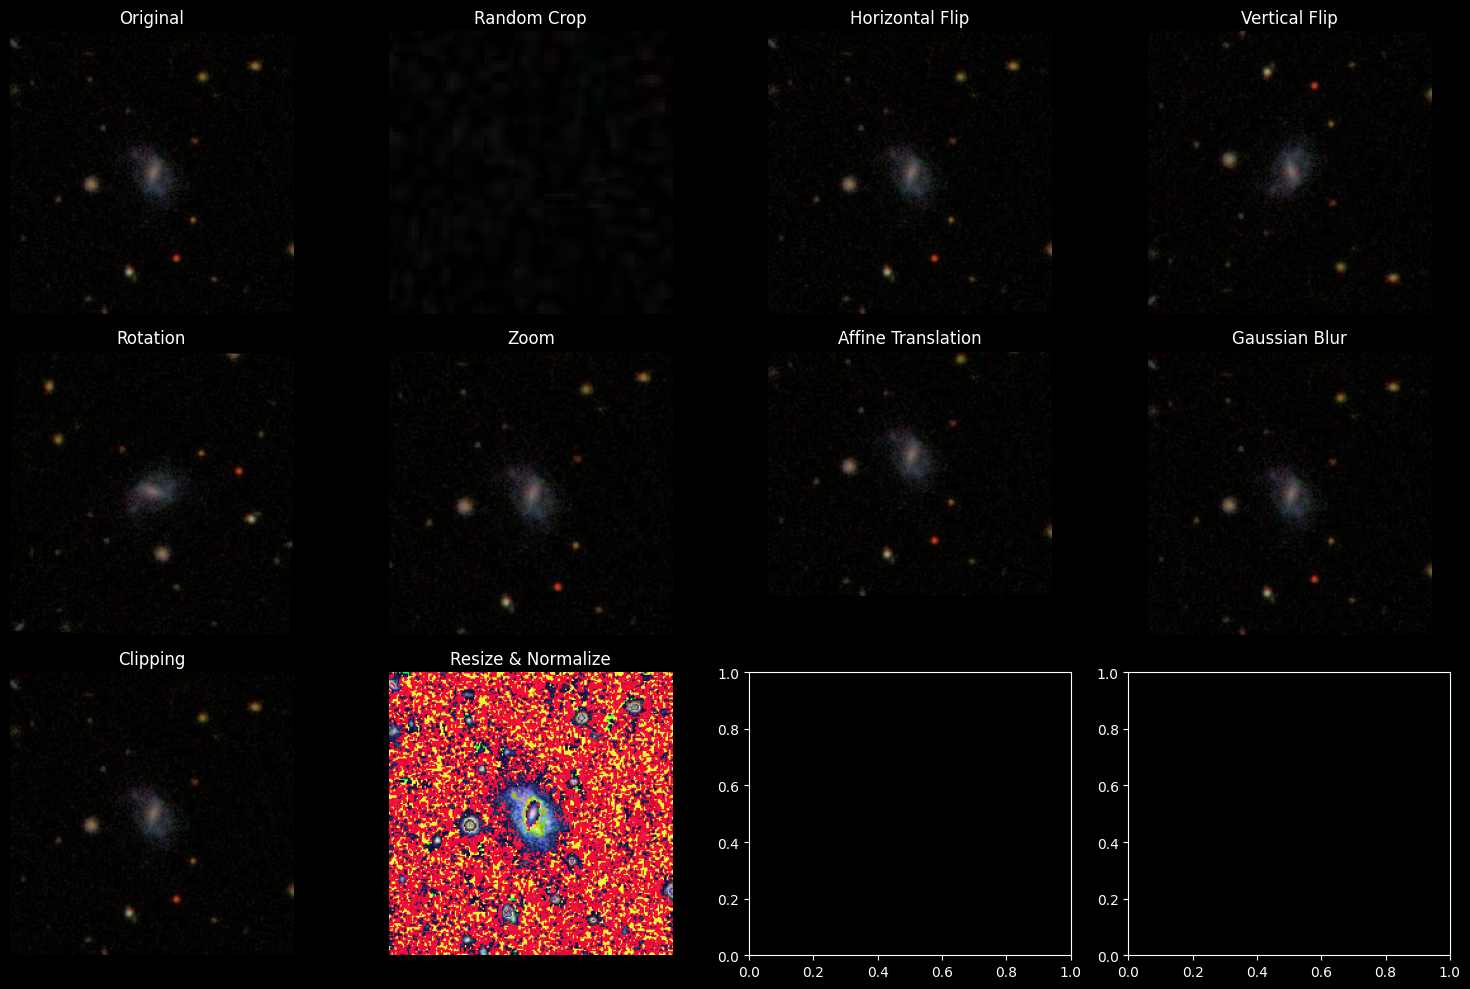

In [40]:
import os
import yaml
import torch
import random
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from PIL import Image
from data.augmentations import Augmentations

# Load configuration paths
augmentations_config = "configs/augmentations_config.yaml"
main_config = "configs/main_config.yaml"
dataset_config_path = "configs/dataset_config.yaml"

# Load dataset path from configuration
with open(dataset_config_path, "r") as file:
    dataset_config = yaml.safe_load(file)
data_path = dataset_config["dataset"]["data_path"]

# Get a random image from the dataset directory
image_files = [f for f in os.listdir(data_path) if f.endswith((".jpg", ".png", ".jpeg"))]
if not image_files:
    raise FileNotFoundError(f"No images found in dataset directory: {data_path}")
random_image_path = os.path.join(data_path, random.choice(image_files))

# Load the randomly chosen image
original_image = Image.open(random_image_path).convert("RGB")

# Initialize Augmentations
augmentor = Augmentations(augmentations_config, main_config)

# Define the augmentations to visualize
augmentations = [
    ("Original", lambda img: img),
    ("Random Crop", augmentor.random_crop),
    ("Horizontal Flip", augmentor.random_horizontal_flip),
    ("Vertical Flip", augmentor.random_vertical_flip),
    ("Rotation", augmentor.random_rotation),
    ("Zoom", augmentor.zoom),
    ("Affine Translation", augmentor.affine_translation),
    ("Gaussian Blur", augmentor.gaussian_blur),
    #("Noise", augmentor.noise),
    ("Clipping", augmentor.clipping),
    ("Resize & Normalize", augmentor.resize_and_normalize),
]

# Plot results
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, augment_fn) in enumerate(augmentations):
    if idx >= len(axes):
        break
    aug_image = augment_fn(original_image)
    if isinstance(aug_image, torch.Tensor):  # Convert tensor back to image if needed
        aug_image = to_pil_image(aug_image)
    
    axes[idx].imshow(aug_image)
    axes[idx].set_title(name)
    axes[idx].axis("off")

plt.tight_layout()
plt.show()
